In [1]:
%env OMP_NUM_THREADS=32
%env OMP_PROC_BIND=spread
%env OMP_PLACES=threads

env: OMP_NUM_THREADS=32
env: OMP_PROC_BIND=spread
env: OMP_PLACES=threads


In [2]:
from ipyparallel import Client
c = Client()
v = c[:]
v.block = True

In [3]:
%%px
import os
import time
print(os.environ["OMP_NUM_THREADS"])

[stdout:0] 32
[stdout:1] 32
[stdout:2] 32
[stdout:3] 32
[stdout:4] 32
[stdout:5] 32
[stdout:6] 32
[stdout:7] 32


In [4]:
%%px

import yt
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource
from yt.funcs import mylog

In [5]:
%%px
yt.enable_parallelism()


[stderr:0] yt : [INFO     ] 2016-11-15 12:44:40,100 Global parallel computation enabled: 4 / 8
[stderr:1] yt : [INFO     ] 2016-11-15 12:44:40,092 Global parallel computation enabled: 7 / 8
[stderr:2] yt : [INFO     ] 2016-11-15 12:44:40,091 Global parallel computation enabled: 1 / 8
[stderr:3] yt : [INFO     ] 2016-11-15 12:44:40,091 Global parallel computation enabled: 5 / 8
[stderr:4] yt : [INFO     ] 2016-11-15 12:44:40,092 Global parallel computation enabled: 2 / 8
[stderr:5] yt : [INFO     ] 2016-11-15 12:44:40,090 Global parallel computation enabled: 6 / 8
[stderr:6] yt : [INFO     ] 2016-11-15 12:44:40,093 Global parallel computation enabled: 3 / 8
[stderr:7] yt : [INFO     ] 2016-11-15 12:44:40,093 Global parallel computation enabled: 0 / 8


Out[0:3]: True

Out[1:3]: True

Out[2:3]: True

Out[3:3]: True

Out[4:3]: True

Out[5:3]: True

Out[6:3]: True

Out[7:3]: True

In [6]:
%%px
#ds = yt.load(os.path.join(os.environ["SCRATCH"], 'nyx/plt00250'))
#ds = yt.load(os.path.join(os.environ["SCRATCH"], 'zarija/plt00953'))
ds = yt.load(os.path.join(os.environ["SCRATCH"], 'zarija/plt00422'))

[stderr:7] 
P000 yt : [INFO     ] 2016-11-15 12:44:58,333 Parameters: current_time              = 0.00148813813391457
P000 yt : [INFO     ] 2016-11-15 12:44:58,333 Parameters: domain_dimensions         = [1024 1024 1024]
P000 yt : [INFO     ] 2016-11-15 12:44:58,334 Parameters: domain_left_edge          = [ 0.  0.  0.]
P000 yt : [INFO     ] 2016-11-15 12:44:58,335 Parameters: domain_right_edge         = [ 29.19708029  29.19708029  29.19708029]


In [7]:
%%px
sc = yt.create_scene(ds, "particle_mass_density")

In [8]:
%%px

mylog.setLevel("DEBUG")

if yt.is_root() :
    start = time.time()

sc.render()

if yt.is_root() :
    print(time.time() - start)

[stdout:7] 69.32116675376892


[stderr:0] 
P004 yt : [INFO     ] 2016-11-15 12:45:06,595 Rendering scene (Can take a while).
P004 yt : [INFO     ] 2016-11-15 12:45:06,597 Creating volume
P004 yt : [DEBUG    ] 2016-11-15 12:45:06,598 Building AMRKDTree
P004 yt : [DEBUG    ] 2016-11-15 12:45:15,753 Reading 262144 cells of ['particle_mass_density'] fields in 1 grids
/global/common/cori/software/python/3.5-anaconda/lib/python3.5/site-packages/yt/utilities/amr_kdtree/amr_kdtree.py:311: RuntimeWarning: invalid value encountered in log10
  dds.append(np.log10(vcd[field].astype('float64')))
P004 yt : [DEBUG    ] 2016-11-15 12:45:15,847 Reading 262144 cells of ['particle_mass_density'] fields in 1 grids
/global/common/cori/software/python/3.5-anaconda/lib/python3.5/site-packages/yt/utilities/amr_kdtree/amr_kdtree.py:311: RuntimeWarning: divide by zero encountered in log10
  dds.append(np.log10(vcd[field].astype('float64')))
P004 yt : [DEBUG    ] 2016-11-15 12:45:15,908 Reading 262144 cells of ['particle_mass_density'] fields

[output:7]

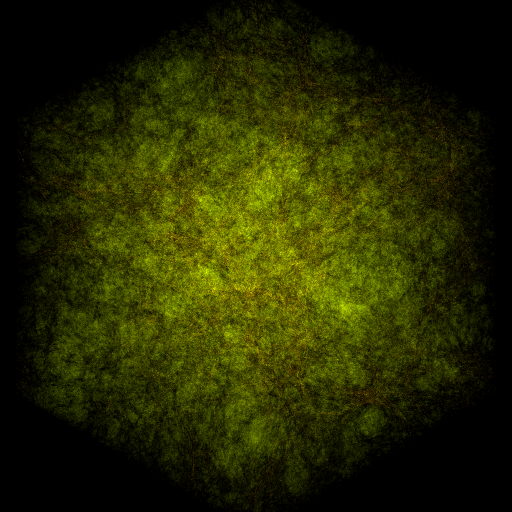

In [9]:
%%px
if yt.is_root():
    sc.show()

In [10]:
%%px
tfh = TransferFunctionHelper(ds)
tfh.set_field('particle_mass_density')
tfh.set_log(True)
tfh.set_bounds((1e0, 1e16))
tfh.build_transfer_function()
tfh.tf.add_layers(10, colormap='gist_rainbow')

[stderr:0] 
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,423 Adding gaussian at 0.16 with width 0.001953125 and colors (1.0, 0.0, 0.11816993464052288, 0.001)
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,424 Adding gaussian at 1.90222222222 with width 0.001953125 and colors (1.0, 0.47376788553259147, 0.0, 0.0021544346900318843)
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,425 Adding gaussian at 3.64444444444 with width 0.001953125 and colors (0.93269740328563855, 1.0, 0.0, 0.0046415888336127772)
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,425 Adding gaussian at 5.38666666667 with width 0.001953125 and colors (0.33916269210386851, 1.0, 0.0, 0.01)
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,426 Adding gaussian at 7.12888888889 with width 0.001953125 and colors (0.0, 1.0, 0.25300442757748243, 0.021544346900318832)
P004 yt : [DEBUG    ] 2016-11-15 12:46:47,427 Adding gaussian at 8.87111111111 with width 0.001953125 and colors (0.0, 1.0, 0.8222643896268188, 0.046415888336127774)
P004 yt : [DEBUG    ] 201

In [11]:
%%px
render_source = sc.get_source(0)
render_source.transfer_function = tfh.tf


In [12]:
%%px
sc.render()

[stderr:0] 
P004 yt : [INFO     ] 2016-11-15 12:46:54,772 Rendering scene (Can take a while).
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,775 Casting rays
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,777 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,789 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,802 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,814 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,828 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DEBUG    ] 2016-11-15 12:46:54,838 Using sampler <yt.utilities.lib.image_samplers.VolumeRenderSampler object at 0x2aaad4250798>
P004 yt : [DE

Out[0:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[1:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[2:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[3:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[4:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[5:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[6:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

Out[7:10]: 
ImageArray([[[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       ..., 
       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.

[output:7]

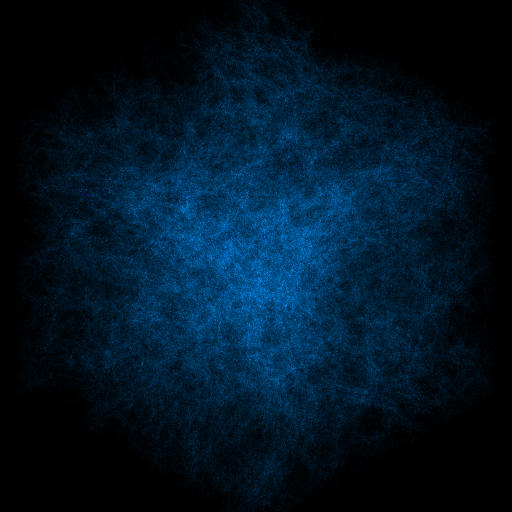

In [13]:
%%px
if yt.is_root():
    sc.show()